# Machine Learning Lab

## Part 1: Preprocessing and EDA

### Problem 1: Dataset Import and Cleaning

In [1]:
# Load package
import pandas as pd

# Import dataset
orders = pd.read_csv('data/Orders.csv')
orders

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",$65.10,5,0.0,$4.50,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",$16.72,5,0.2,$3.34,1.930,High
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,OFF-AR-5321,Office Supplies,Art,Newell 341,$8.56,2,0.0,$2.48,1.580,High
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",$13.44,2,0.0,$2.40,1.003,Medium


In [2]:
# Inspect df dtype
orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [3]:
# Convert Profit and Sales to numeric
orders['Profit'] = orders['Profit'].astype(str)
orders['Profit'] = orders['Profit'].str.replace('$', '').str.replace(',', '').apply(pd.to_numeric, errors='coerce')

orders['Sales'] = orders['Sales'].astype(str)
orders['Sales'] = orders['Sales'].str.replace('$', '').str.replace(',', '').apply(pd.to_numeric, errors='coerce')

In [4]:
# Inspect Profit and Sales cols
orders[['Sales', 'Profit']]

,Sales,Profit
0,221.98,62.15
1,3709.40,-288.77
2,5175.17,919.97
3,2892.51,-96.54
4,2832.96,311.52
...,...,...
51285,65.10,4.50
51286,16.72,3.34
51287,8.56,2.48
51288,13.44,2.40


In [5]:
# Convert Order.Date to date type
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'], format = '%m/%d/%y')
orders['Order.Date']

0       2014-11-11
1       2014-02-05
2       2014-10-17
3       2014-01-28
4       2014-11-05
           ...    
51285   2015-06-19
51286   2014-05-06
51287   2012-08-26
51288   2013-02-17
51289   2013-05-22
Name: Order.Date, Length: 51290, dtype: datetime64[ns]

In [6]:
# Parse out month and year
orderdate = orders['Order.Date']
orders['Order.Month'] = [x.month for x in orderdate]
orders['Order.Year'] = [x.year for x in orderdate]

In [7]:
# Inspect results
orders.loc[:,['Order.Date','Order.Month','Order.Year']]

,Order.Date,Order.Month,Order.Year
0,2014-11-11,11,2014
1,2014-02-05,2,2014
2,2014-10-17,10,2014
3,2014-01-28,1,2014
4,2014-11-05,11,2014
...,...,...,...
51285,2015-06-19,6,2015
51286,2014-05-06,5,2014
51287,2012-08-26,8,2012
51288,2013-02-17,2,2013


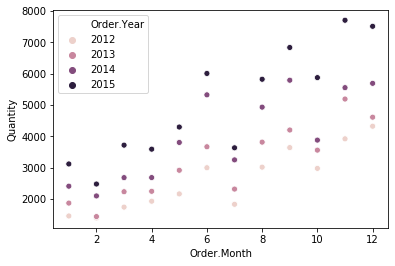

In [10]:
inventory_trend = orders.groupby(['Order.Month', 'Order.Year']).agg({'Quantity': 'sum'}).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.scatterplot('Order.Month', 'Quantity', hue = 'Order.Year', data = inventory_trend)

### Problem 2: Inventory Management

#### Q2.1: Is there any seasonal trend of inventory in the company?

([<matplotlib.axis.XTick at 0x122bdfa10>,
 <a list of 12 Text xticklabel objects>)

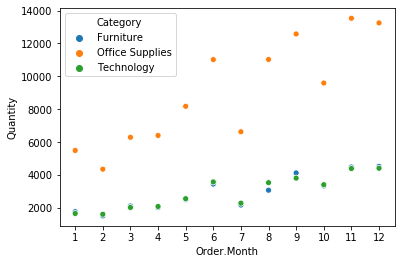

In [11]:
orders['Category'] = orders['Category'].astype('category')
orders['Sub.Category'] = orders['Sub.Category'].astype('category')

category_trend = orders.groupby(['Order.Month', 'Category']).agg({'Quantity': 'sum'}).reset_index()
sns.scatterplot('Order.Month', 'Quantity', hue = 'Category', data = category_trend)
plt.xticks(np.arange(1, 13, 1))

#### Q2.2: Is seasonal trend same for different categories?

### Problem 3: Why did customers make returns?

## Part 2: Machine Learning and Business Use Case

### Problem 4: Feature Engineering

### Problem 5: Fitting Models

### Problem 6: Evaluating Models

### Problem 7: Feature Engineering Revisit